In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from result_saver import SaverProvider, metadata_loader
from time import sleep

continue_running = True
while continue_running:
    try: 
        print("Starting saver provider")
        provider = SaverProvider()
        continue_running = False
    except Exception as e:
        print(e)
        sleep(5)

Starting saver provider


In [3]:
df = metadata_loader(True, True)
filt_df = df[(df["notebook_name"]=="DEEP_get_IQ_calibration_data_Mumbai") & (df["shots"]==int(1e5))].dropna(subset=["optimization_level"])

filt_df = filt_df[:2]
filt_df

,creation_date,notebook_name,backend_name,job_id,tags,meas_level,shots,tags_xp,rep_delay,sampled_state,...,extra,optimization_level,code,distance,rounds,logical,layout,descr,num_CNOTS_layers,num_CNOT_layers
2594,2024-03-08 11:31:15.446000+01:00,DEEP_get_IQ_calibration_data_Mumbai,ibmq_mumbai,cqnehwzc8df0008b4ry0,"[Calibration, Deep_circuit]",1.0,100000.0,NaN,NaN,000000000000000000000000000,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0
2593,2024-03-08 11:31:06.018000+01:00,DEEP_get_IQ_calibration_data_Mumbai,ibmq_mumbai,cqnehtfc8df0008b4rxg,"[Calibration, Deep_circuit]",1.0,100000.0,NaN,NaN,111111111111111111111111111,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0


In [4]:
memories = {}
for job_id, sampled_state in zip(filt_df["job_id"], filt_df["sampled_state"]):
    mmr_name = f"mmr_{sampled_state[0]}'s"
    job = provider.retrieve_job(job_id)
    memories[mmr_name] = job.result().get_memory()

print(len(memories["mmr_0's"]))
memories["mmr_0\'s"][0,26]

100000


(37869631-213193841j)

# Reorder the 27 qubits

In [5]:
from qiskit_ibm_provider import IBMProvider
ibm_provider = IBMProvider()

In [11]:
import numpy as np

layouts = {}
for job_id, sampled_state in zip(filt_df["job_id"], filt_df["sampled_state"]):
    job = ibm_provider.retrieve_job(job_id)

    layout = job.circuits()[0].layout
    print(layout)

    final_layout = layout.final_layout
    if final_layout is None:
        final_layout = layout.initial_layout.get_virtual_bits()
    else:
        final_layout = final_layout.get_virtual_bits()
    layouts[sampled_state[0]] = {qubit.index: final_layout[qubit] for qubit in final_layout}

print(layouts)

TranspileLayout(initial_layout=Layout({
0: Qubit(QuantumRegister(27, 'q'), 0),
1: Qubit(QuantumRegister(27, 'q'), 1),
2: Qubit(QuantumRegister(27, 'q'), 2),
3: Qubit(QuantumRegister(27, 'q'), 3),
4: Qubit(QuantumRegister(27, 'q'), 4),
5: Qubit(QuantumRegister(27, 'q'), 5),
6: Qubit(QuantumRegister(27, 'q'), 6),
7: Qubit(QuantumRegister(27, 'q'), 7),
8: Qubit(QuantumRegister(27, 'q'), 8),
9: Qubit(QuantumRegister(27, 'q'), 9),
10: Qubit(QuantumRegister(27, 'q'), 10),
11: Qubit(QuantumRegister(27, 'q'), 11),
12: Qubit(QuantumRegister(27, 'q'), 12),
13: Qubit(QuantumRegister(27, 'q'), 13),
14: Qubit(QuantumRegister(27, 'q'), 14),
15: Qubit(QuantumRegister(27, 'q'), 15),
16: Qubit(QuantumRegister(27, 'q'), 16),
17: Qubit(QuantumRegister(27, 'q'), 17),
18: Qubit(QuantumRegister(27, 'q'), 18),
19: Qubit(QuantumRegister(27, 'q'), 19),
20: Qubit(QuantumRegister(27, 'q'), 20),
21: Qubit(QuantumRegister(27, 'q'), 21),
22: Qubit(QuantumRegister(27, 'q'), 22),
23: Qubit(QuantumRegister(27, 'q'), 2

In [7]:
# Reorder the array according to layout_dict
for key in memories.keys():
    your_array = memories[key]
    reordered_array = np.zeros_like(your_array)
    if key == "mmr_0's":
        layout_dict = layouts['0']
    elif key == "mmr_1's":
        layout_dict = layouts['1']
    for old_order_index, transpiled_index in layout_dict.items():
        reordered_array[:, transpiled_index] = your_array[:, old_order_index] # old: 0 physical: 3. In IQ 0th entry is 3rd qubit => 0th entry -> 3rd entry
    memories[key] = reordered_array

# Plot ```ALL``` the IQ data

15:35:37 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations. IN FILE: /Users/mha/My_Drive/Desktop/Studium/Physik/MSc/Semester_3/IBM/IBM_GIT/Soft-Info/src/soft_info/IQ_data/plotter.py, LINE: 144


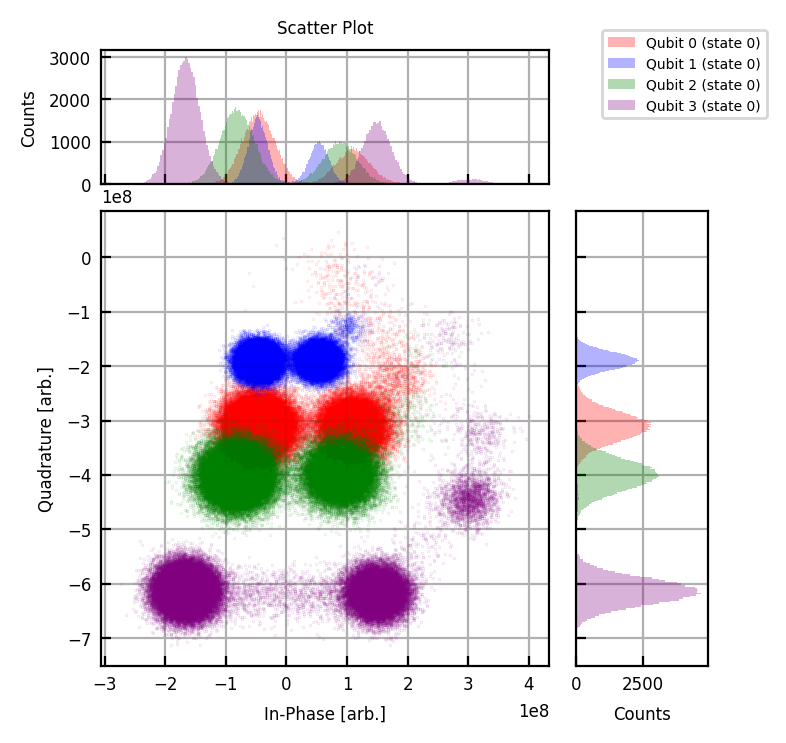

15:35:38 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations. IN FILE: /Users/mha/My_Drive/Desktop/Studium/Physik/MSc/Semester_3/IBM/IBM_GIT/Soft-Info/src/soft_info/IQ_data/plotter.py, LINE: 144


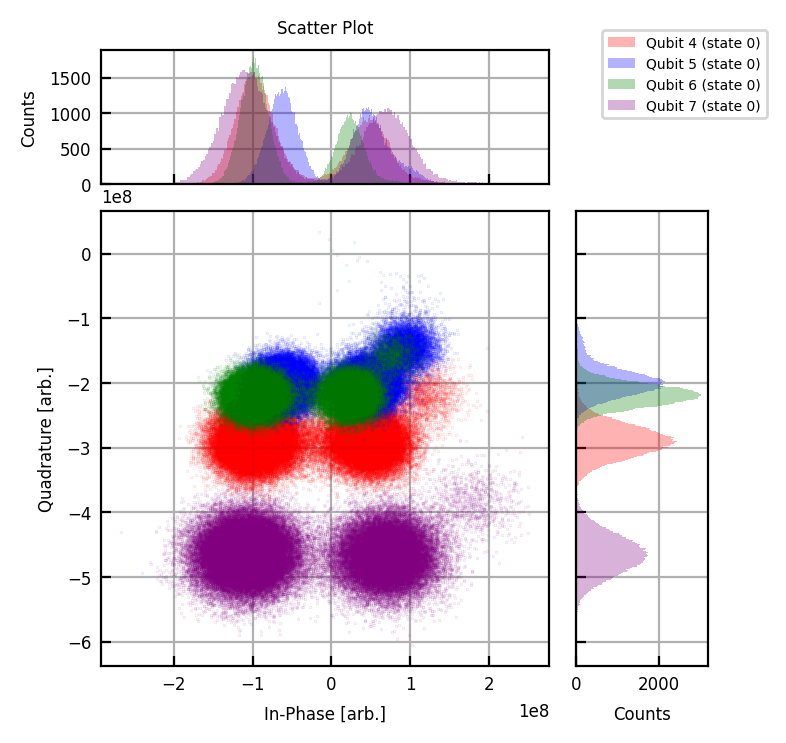

15:35:39 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations. IN FILE: /Users/mha/My_Drive/Desktop/Studium/Physik/MSc/Semester_3/IBM/IBM_GIT/Soft-Info/src/soft_info/IQ_data/plotter.py, LINE: 144


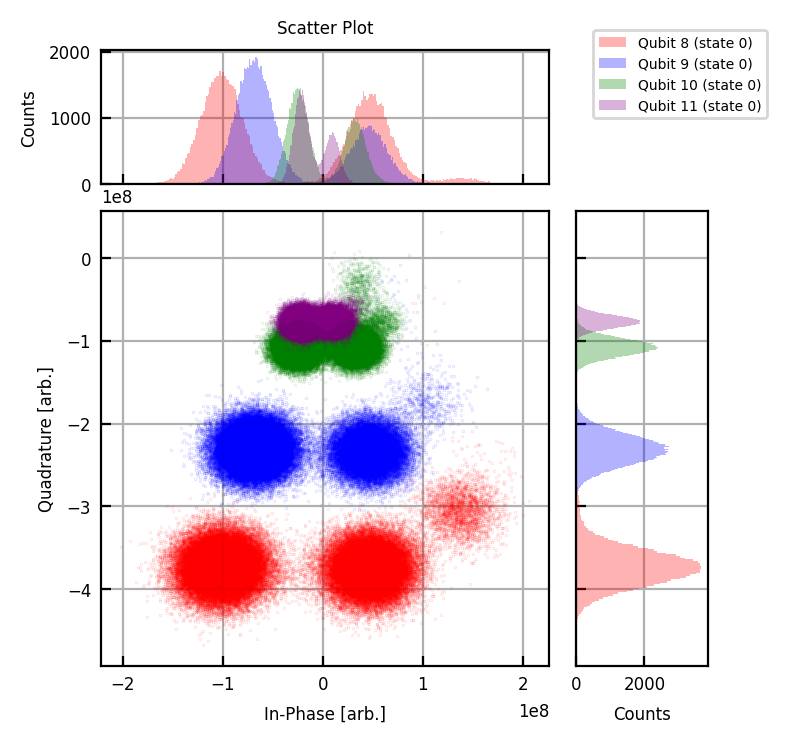

15:35:40 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations. IN FILE: /Users/mha/My_Drive/Desktop/Studium/Physik/MSc/Semester_3/IBM/IBM_GIT/Soft-Info/src/soft_info/IQ_data/plotter.py, LINE: 144


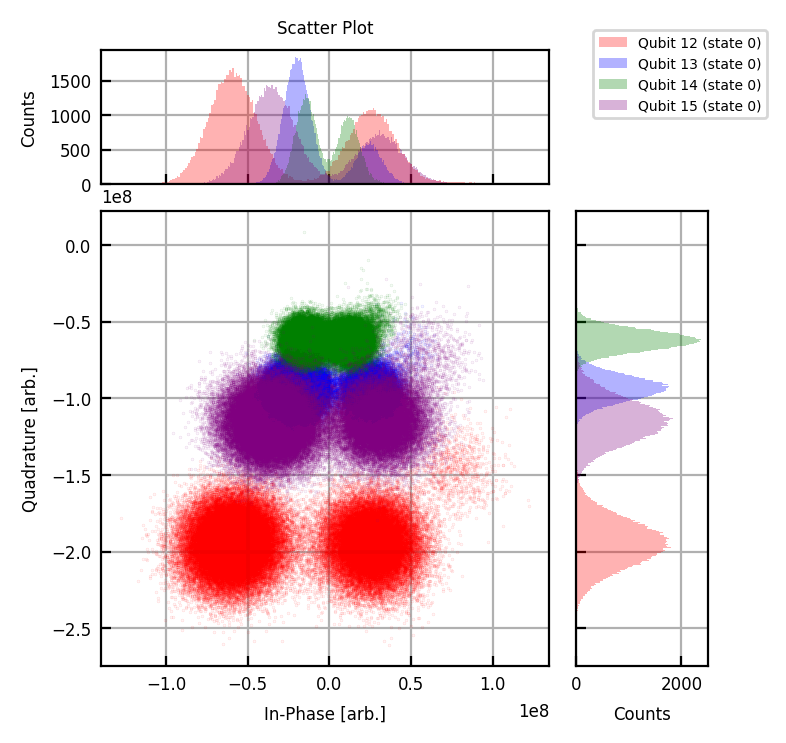

15:35:40 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations. IN FILE: /Users/mha/My_Drive/Desktop/Studium/Physik/MSc/Semester_3/IBM/IBM_GIT/Soft-Info/src/soft_info/IQ_data/plotter.py, LINE: 144


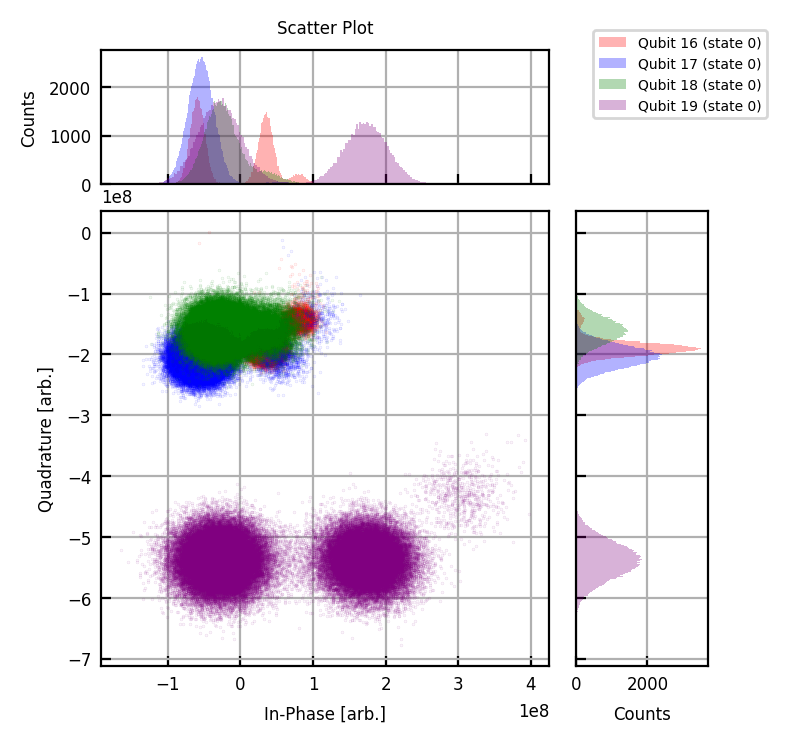

15:35:41 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations. IN FILE: /Users/mha/My_Drive/Desktop/Studium/Physik/MSc/Semester_3/IBM/IBM_GIT/Soft-Info/src/soft_info/IQ_data/plotter.py, LINE: 144


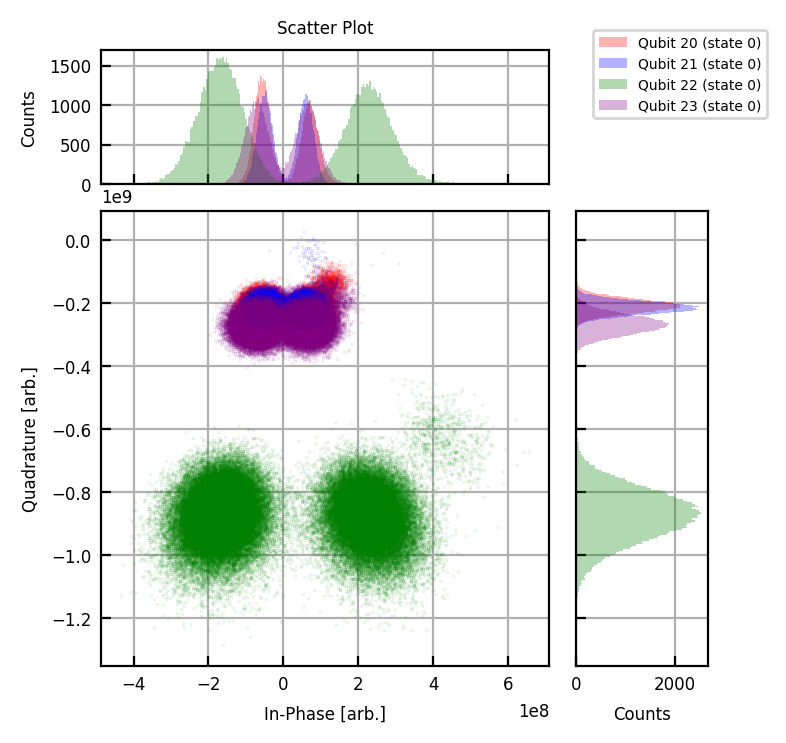

15:35:42 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations. IN FILE: /Users/mha/My_Drive/Desktop/Studium/Physik/MSc/Semester_3/IBM/IBM_GIT/Soft-Info/src/soft_info/IQ_data/plotter.py, LINE: 144


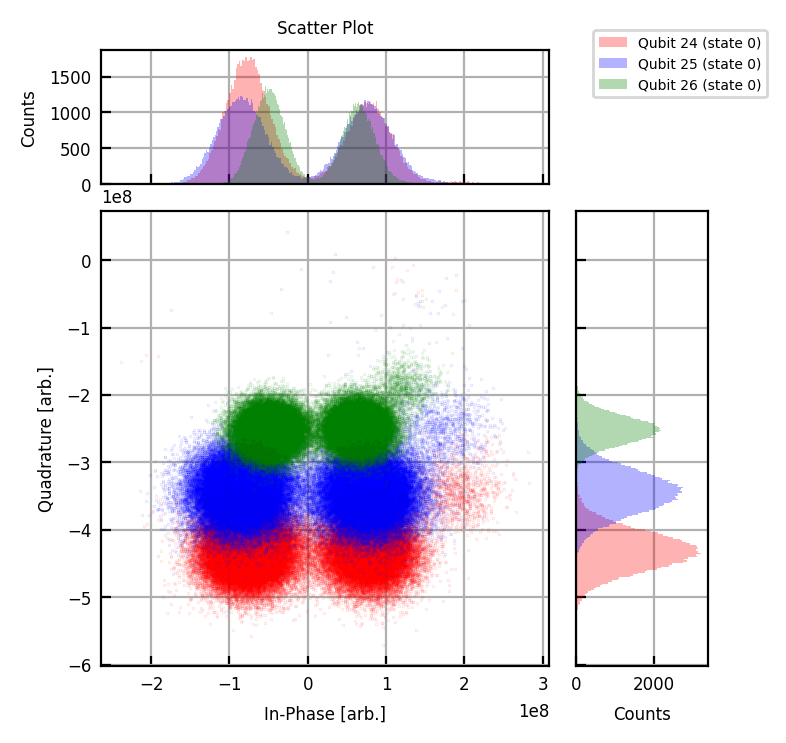

In [8]:
from soft_info import plot_multiple_IQ_data
import numpy as np

data = memories["mmr_0's"]  # Replace with your actual data
n_shots = int(1e5)
n_qubits = data.shape[1]  # Get the number of qubits

# Loop through the data in groups of 4 qubits at a time
for i in range(0, n_qubits, 4):
    upper_bound = min(i + 4, n_qubits)  # Make sure we don't go out of bounds
    data_subset = data[:n_shots, i:upper_bound]
    
    # Create legend labels for these qubits
    labels = [f'Qubit {i+j} (state 0)' for j in range(upper_bound - i)]
    
    plot_multiple_IQ_data([data_subset[:, j] for j in range(data_subset.shape[1])], legend_labels=labels)


15:38:56 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations. IN FILE: /Users/mha/My_Drive/Desktop/Studium/Physik/MSc/Semester_3/IBM/IBM_GIT/Soft-Info/src/soft_info/IQ_data/plotter.py, LINE: 144


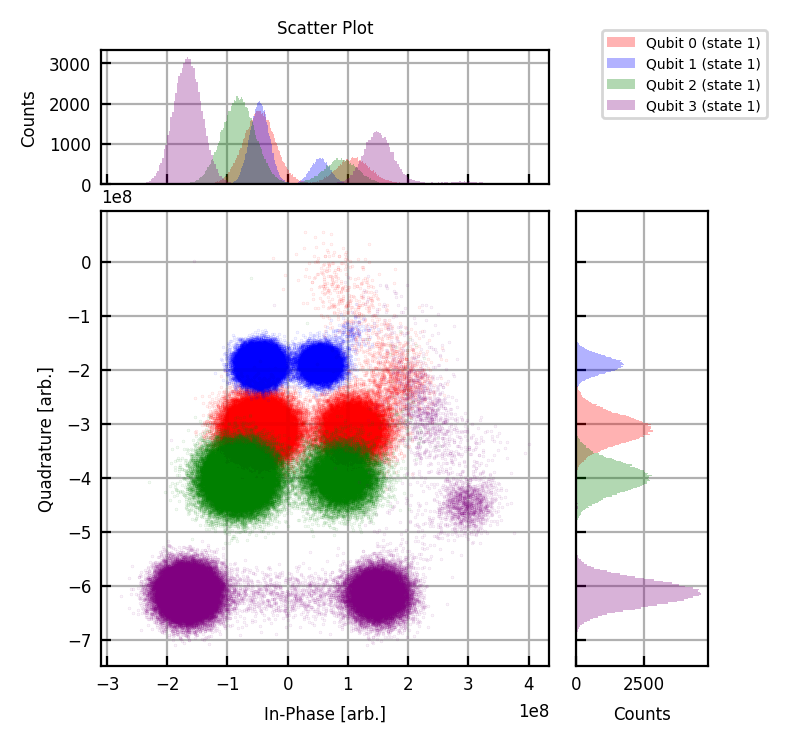

15:38:57 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations. IN FILE: /Users/mha/My_Drive/Desktop/Studium/Physik/MSc/Semester_3/IBM/IBM_GIT/Soft-Info/src/soft_info/IQ_data/plotter.py, LINE: 144


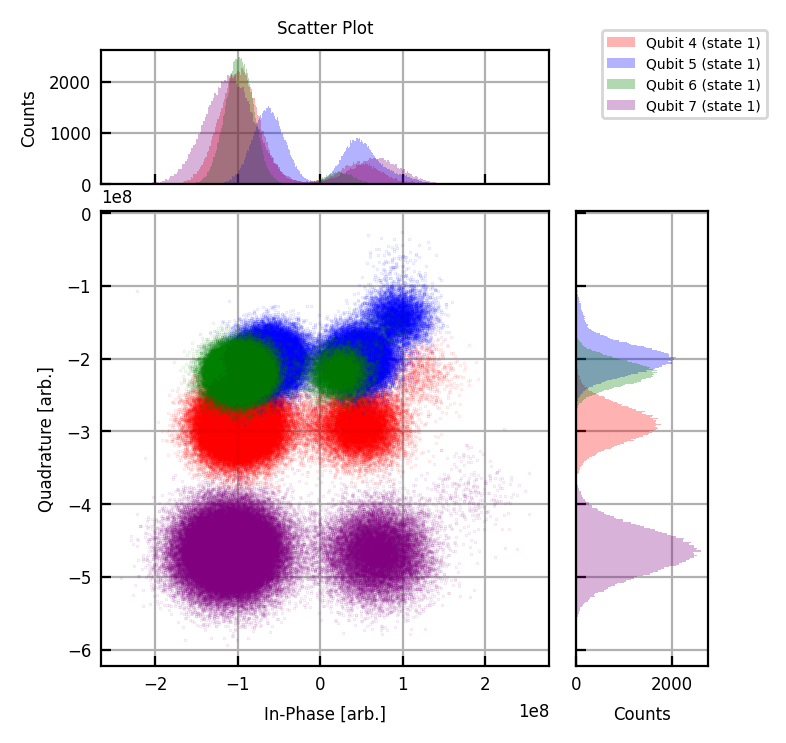

15:38:58 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations. IN FILE: /Users/mha/My_Drive/Desktop/Studium/Physik/MSc/Semester_3/IBM/IBM_GIT/Soft-Info/src/soft_info/IQ_data/plotter.py, LINE: 144


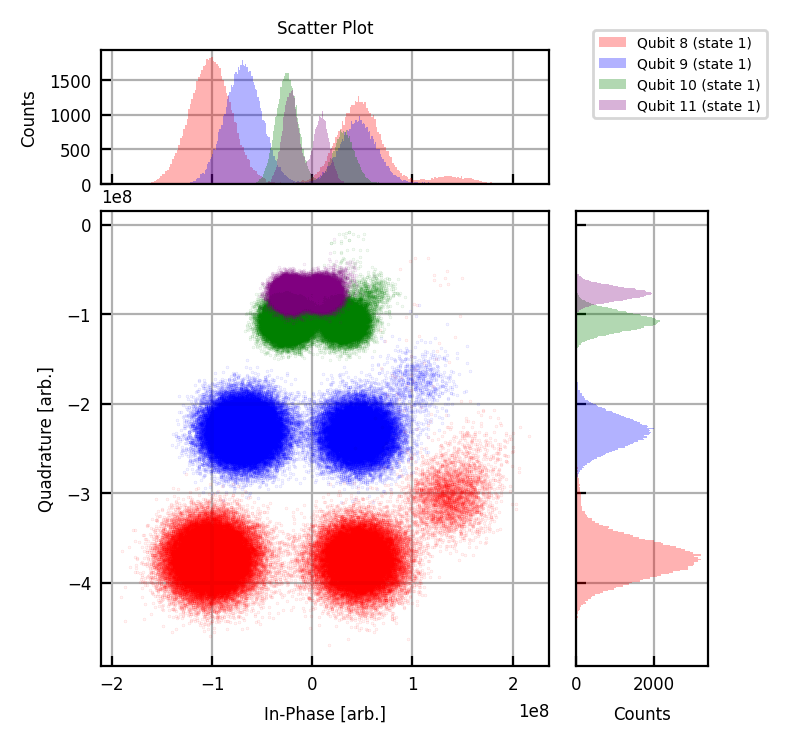

15:38:59 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations. IN FILE: /Users/mha/My_Drive/Desktop/Studium/Physik/MSc/Semester_3/IBM/IBM_GIT/Soft-Info/src/soft_info/IQ_data/plotter.py, LINE: 144


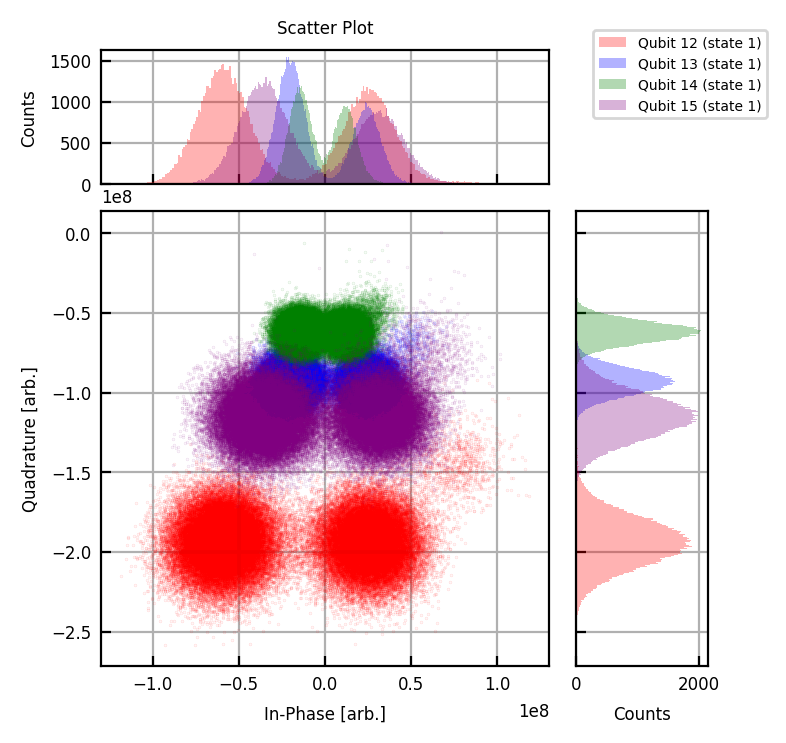

15:39:00 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations. IN FILE: /Users/mha/My_Drive/Desktop/Studium/Physik/MSc/Semester_3/IBM/IBM_GIT/Soft-Info/src/soft_info/IQ_data/plotter.py, LINE: 144


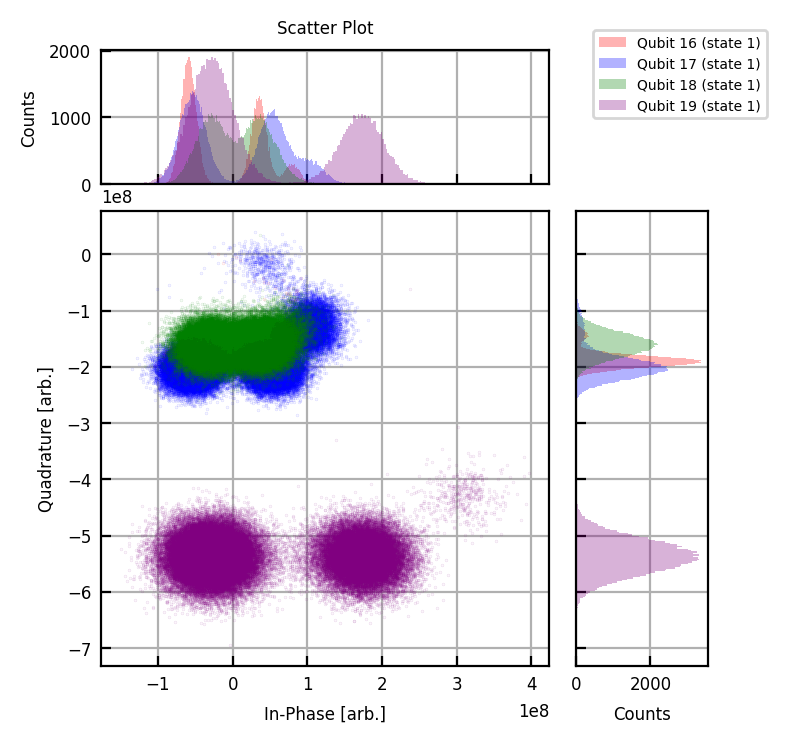

15:39:01 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations. IN FILE: /Users/mha/My_Drive/Desktop/Studium/Physik/MSc/Semester_3/IBM/IBM_GIT/Soft-Info/src/soft_info/IQ_data/plotter.py, LINE: 144


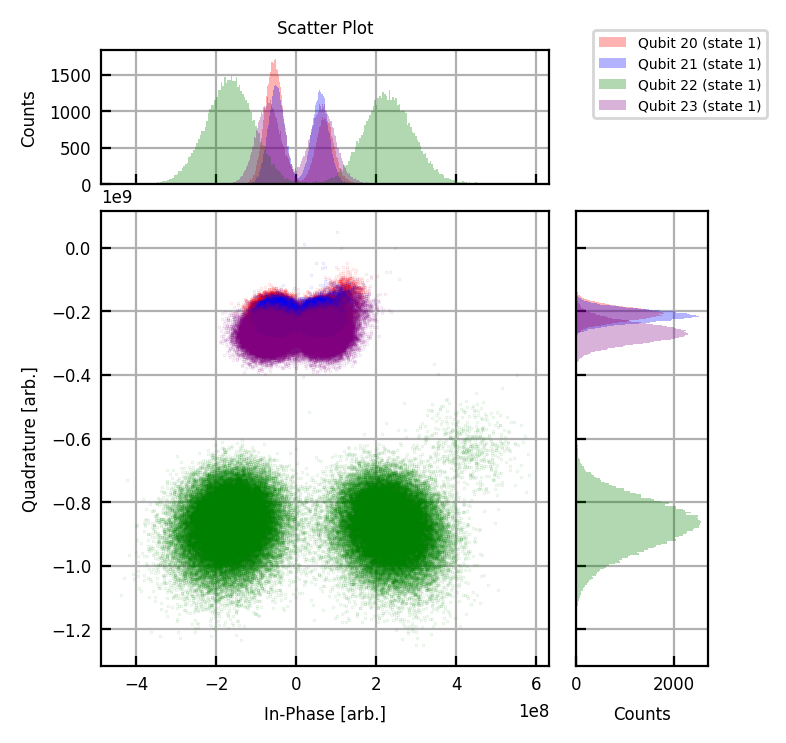

15:39:01 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations. IN FILE: /Users/mha/My_Drive/Desktop/Studium/Physik/MSc/Semester_3/IBM/IBM_GIT/Soft-Info/src/soft_info/IQ_data/plotter.py, LINE: 144


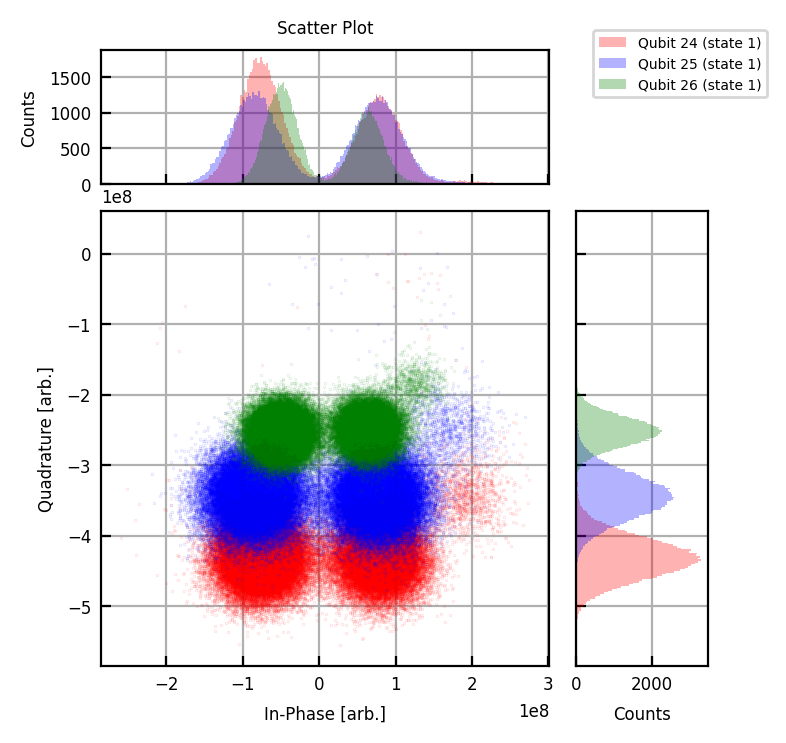

In [10]:
from soft_info import plot_multiple_IQ_data
import numpy as np

data = memories["mmr_1's"]  # Replace with your actual data
n_shots = int(1e5)
n_qubits = data.shape[1]  # Get the number of qubits

# Loop through the data in groups of 4 qubits at a time
for i in range(0, n_qubits, 4):
    upper_bound = min(i + 4, n_qubits)  # Make sure we don't go out of bounds
    data_subset = data[:n_shots, i:upper_bound]
    
    # Create legend labels for these qubits
    labels = [f'Qubit {i+j} (state 1)' for j in range(upper_bound - i)]
    
    plot_multiple_IQ_data([data_subset[:, j] for j in range(data_subset.shape[1])], legend_labels=labels)
